<a href="https://colab.research.google.com/github/onee2505/Portfolio/blob/main/DL_pneu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## install D2l
!pip install d2l==1.0.0-beta0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import matplotlib as mat
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

pd.options.display.max_colwidth = 100

import random
import os

from numpy.random import seed
seed(42)

random.seed(42)
os.environ['PYTHONHASHSEED'] = str(42)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator

import glob
import cv2

from tensorflow.random import set_seed
set_seed(42)

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from IPython.utils.process import shutil
### unpack the data folders
import shutil
shutil.unpack_archive('/content/drive/MyDrive/chest_xray.zip')

In [ ]:
IMG_SIZE = 224
BATCH = 32
SEED = 42

In [ ]:
main_path = "/content"
train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")
train_path = os.path.join(main_path, "train")
test_path = os.path.join(main_path, "test")
train_normal = glob.glob(os.path.join(train_path, "NORMAL/*.jpeg"))
train_pneumonia = glob.glob(os.path.join(train_path, "PNEUMONIA/*.jpeg"))
test_normal = glob.glob(os.path.join(test_path, "NORMAL/*.jpeg"))
test_pneumonia = glob.glob(os.path.join(test_path, "PNEUMONIA/*.jpeg"))

In [ ]:
train_list = [x for x in train_normal]
train_list.extend([x for x in train_pneumonia])

df_train = pd.DataFrame(np.concatenate([['Normal']*len(train_normal) , ['Pneumonia']*len(train_pneumonia)]), columns = ['class'])
df_train['image'] = [x for x in train_list]

test_list = [x for x in test_normal]
test_list.extend([x for x in test_pneumonia])

df_test = pd.DataFrame(np.concatenate([['Normal']*len(test_normal) , ['Pneumonia']*len(test_pneumonia)]), columns = ['class'])
df_test['image'] = [x for x in test_list]

In [ ]:
df_train.shape

(5232, 2)

In [ ]:
df_test.shape

(624, 2)

In [ ]:
df_train.head()

,class,image
0,Normal,/content/train/NORMAL/NORMAL-4656588-0001.jpeg
1,Normal,/content/train/NORMAL/NORMAL-705474-0001.jpeg
2,Normal,/content/train/NORMAL/NORMAL-9382452-0001.jpeg
3,Normal,/content/train/NORMAL/NORMAL-483610-0001.jpeg
4,Normal,/content/train/NORMAL/NORMAL-4093513-0001.jpeg


In [ ]:
df_test.head()

,class,image
0,Normal,/content/test/NORMAL/NORMAL-3267425-0001.jpeg
1,Normal,/content/test/NORMAL/NORMAL-5175014-0001.jpeg
2,Normal,/content/test/NORMAL/NORMAL-5487025-0001.jpeg
3,Normal,/content/test/NORMAL/NORMAL-2959018-0001.jpeg
4,Normal,/content/test/NORMAL/NORMAL-7236364-0001.jpeg


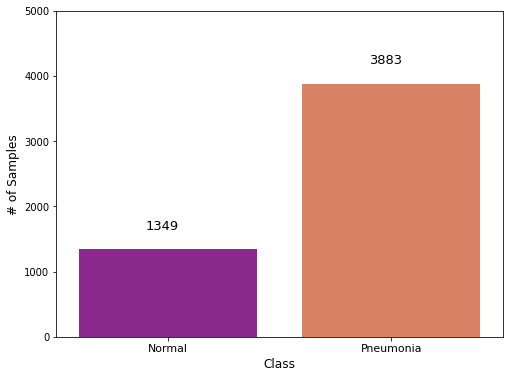

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='class', data=df_train, palette="plasma")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,5000)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.30, p.get_height()+300), fontsize = 13)

plt.show()

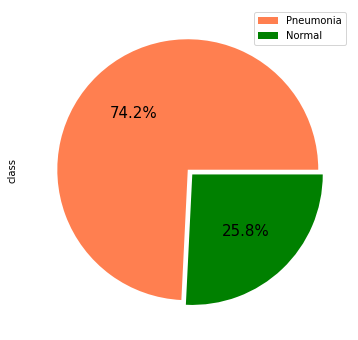

In [ ]:
plt.figure(figsize=(9,6))

df_train['class'].value_counts().plot(kind='pie',labels = ['',''],
                                      autopct='%1.1f%%', colors = ['coral','green'],
                                      explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

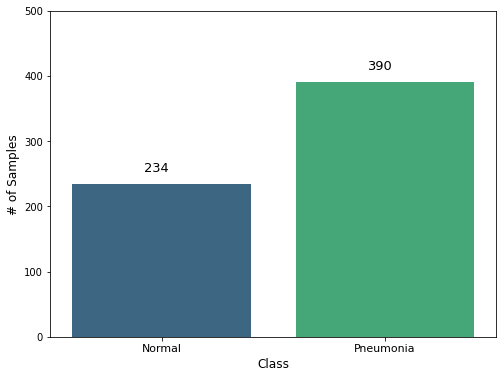

In [ ]:
plt.figure(figsize=(8,6))

ax = sns.countplot(x='class', data=df_test, palette="viridis")

plt.xlabel("Class", fontsize= 12)
plt.ylabel("# of Samples", fontsize= 12)
plt.ylim(0,500)
plt.xticks([0,1], ['Normal', 'Pneumonia'], fontsize = 11)

for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.32, p.get_height()+20), fontsize = 13)

plt.show()

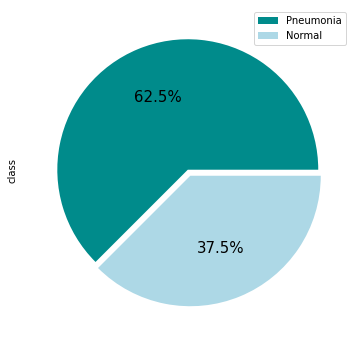

In [ ]:
plt.figure(figsize=(9,6))

df_test['class'].value_counts().plot(kind='pie',labels = ['',''],
                                     autopct='%1.1f%%', colors = ['darkcyan','lightblue'],
                                     explode = [0,0.05], textprops = {"fontsize":15})

plt.legend(labels=['Pneumonia', 'Normal'])
plt.show()

Train Set:Normal


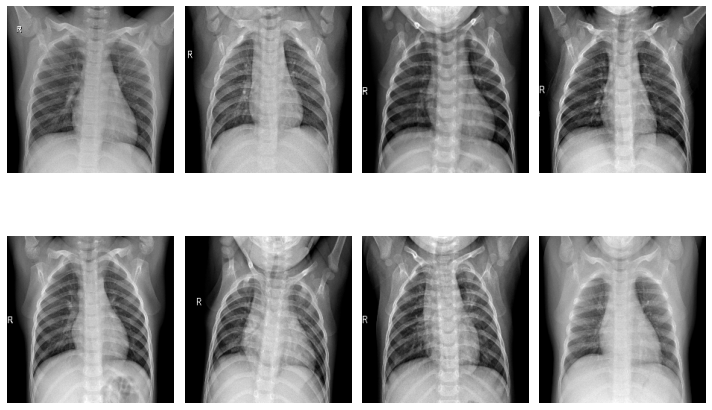

In [ ]:
print('Train Set:Normal')

plt.figure(figsize=(10,10))

for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Train Set:Pneumonia


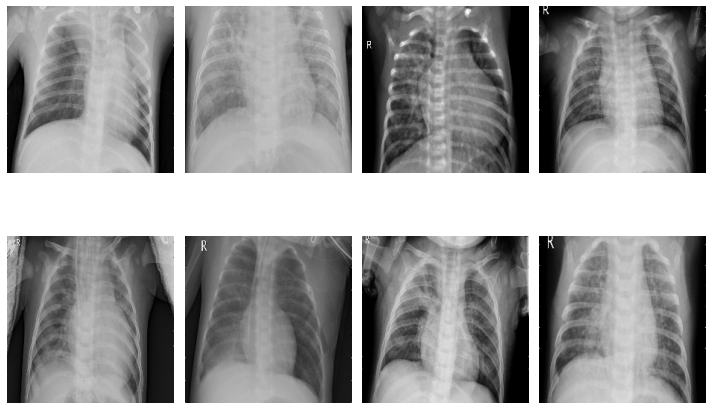

In [ ]:
print('Train Set:Pneumonia')

plt.figure(figsize=(10,10))

for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(train_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set: Normal


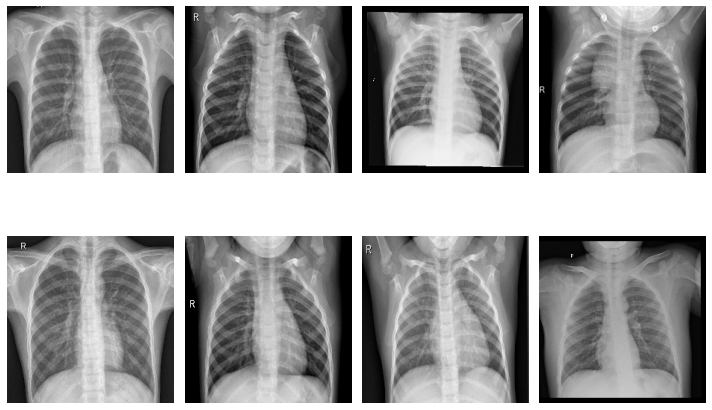

In [ ]:
print('Test Set: Normal')

plt.figure(figsize=(10,10))

for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_normal[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

Test Set: Pneumonia


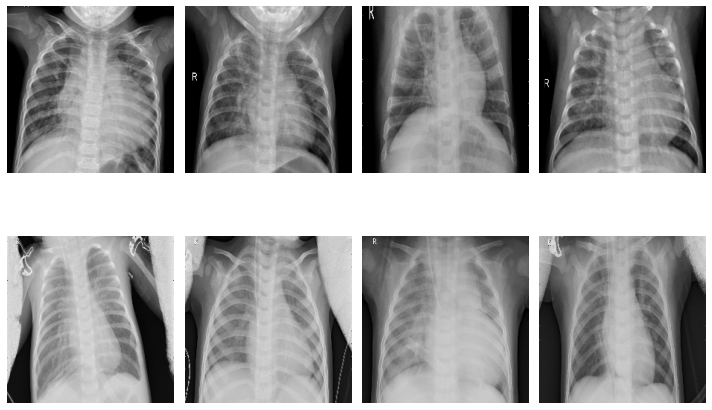

In [ ]:
print('Test Set: Pneumonia')

plt.figure(figsize=(10,10))

for i in range(0, 8):
    plt.subplot(3,4,i + 1)
    img = cv2.imread(test_pneumonia[i])
    img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
    plt.imshow(img)
    plt.axis("off")

plt.tight_layout()

plt.show()

## Data Preparation

In [ ]:
print(type(df_train))

<class 'pandas.core.frame.DataFrame'>


In [ ]:
train_df, val_df = train_test_split(df_train, test_size = 0.20, random_state = SEED, stratify = df_train['class'])

In [ ]:
train_df.head()

,class,image
3566,Pneumonia,/content/train/PNEUMONIA/BACTERIA-6678407-0001.jpeg
2866,Pneumonia,/content/train/PNEUMONIA/BACTERIA-7847892-0006.jpeg
2681,Pneumonia,/content/train/PNEUMONIA/BACTERIA-1982399-0002.jpeg
1199,Normal,/content/train/NORMAL/NORMAL-3688916-0002.jpeg
4619,Pneumonia,/content/train/PNEUMONIA/BACTERIA-1069837-0002.jpeg


In [ ]:
val_df.head()

,class,image
2945,Pneumonia,/content/train/PNEUMONIA/BACTERIA-232309-0002.jpeg
4878,Pneumonia,/content/train/PNEUMONIA/VIRUS-8550709-0010.jpeg
3177,Pneumonia,/content/train/PNEUMONIA/BACTERIA-2603500-0001.jpeg
972,Normal,/content/train/NORMAL/NORMAL-4119877-0001.jpeg
3059,Pneumonia,/content/train/PNEUMONIA/VIRUS-232309-0003.jpeg


In [ ]:
print(val_df.shape)

(1047, 2)


load the images from the folders and prepare them to feed our models.

In [ ]:
train_datagen = ImageDataGenerator(rescale=1/255.,
                                  zoom_range = 0.1,
                                  #rotation_range = 0.1,
                                  width_shift_range = 0.1,
                                  height_shift_range = 0.1)

val_datagen = ImageDataGenerator(rescale=1/255.)

ds_train = train_datagen.flow_from_dataframe(train_df,
                                             #directory=train_path, #dataframe contains the full paths
                                             x_col = 'image',
                                             y_col = 'class',
                                             target_size = (IMG_SIZE, IMG_SIZE),
                                             class_mode = 'binary',
                                             batch_size = BATCH,
                                             seed = SEED)

ds_val = val_datagen.flow_from_dataframe(val_df,
                                            #directory=train_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = BATCH,
                                            seed = SEED)

ds_test = val_datagen.flow_from_dataframe(df_test,
                                            #directory=test_path,
                                            x_col = 'image',
                                            y_col = 'class',
                                            target_size = (IMG_SIZE, IMG_SIZE),
                                            class_mode = 'binary',
                                            batch_size = 1,
                                            shuffle = False)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 validated image filenames belonging to 2 classes.


### CNN Building

In [ ]:
#Setting callbakcs

early_stopping = callbacks.EarlyStopping(
    monitor='val_loss',
    patience=5,
    min_delta=1e-7,
    restore_best_weights=True,
)

plateau = callbacks.ReduceLROnPlateau(
    monitor='val_loss',
    factor = 0.2,
    patience = 2,
    min_delt = 1e-7,
    cooldown = 0,
    verbose = 1
)

In [ ]:
def get_model():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # Block One
    x = layers.Conv2D(filters=16, kernel_size=3, padding='valid')(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Two
    x = layers.Conv2D(filters=32, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.2)(x)

    # Block Three
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.Conv2D(filters=64, kernel_size=3, padding='valid')(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPool2D()(x)
    x = layers.Dropout(0.4)(x)

    # Head
    #x = layers.BatchNormalization()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(64, activation='relu')(x)
    x = layers.Dropout(0.5)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

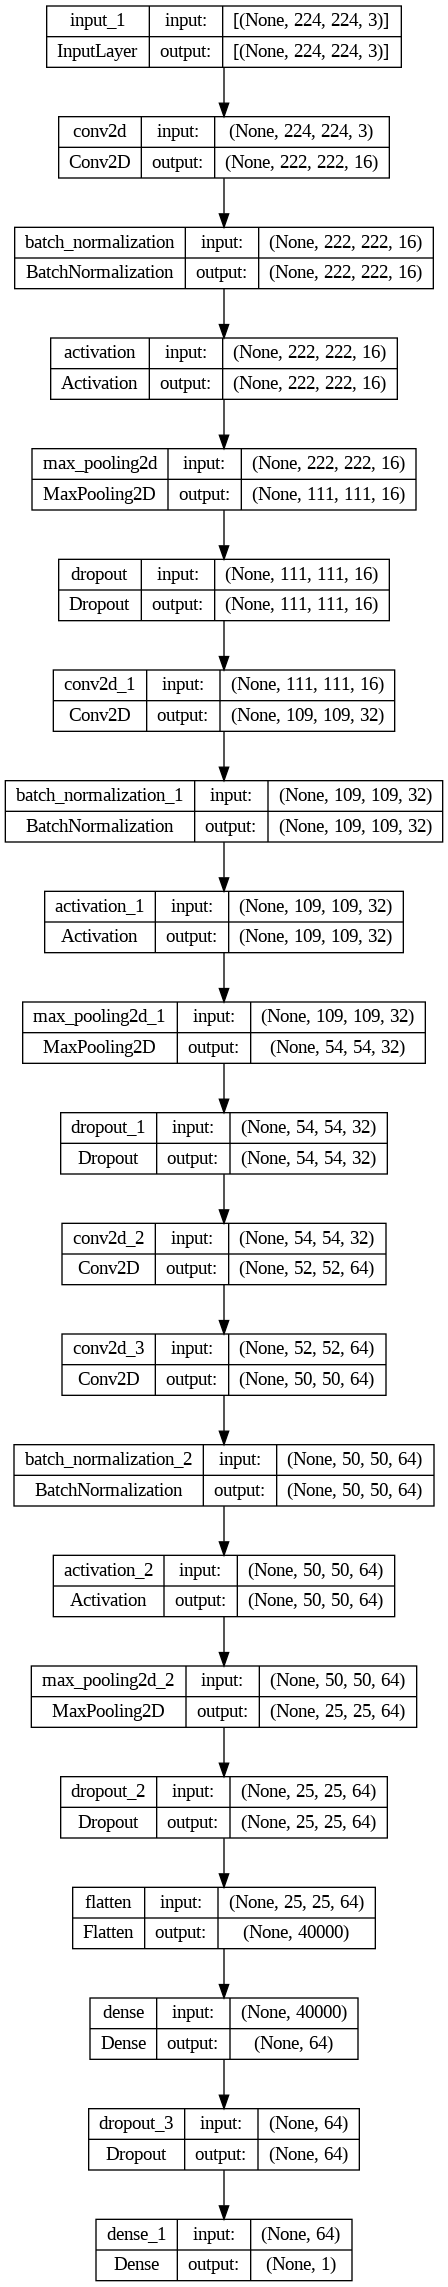

In [ ]:
from keras.utils import plot_model

model = get_model()
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)


In [ ]:
keras.backend.clear_session()

model = get_model()
model.compile(loss='binary_crossentropy'
              , optimizer = keras.optimizers.Adam(learning_rate=3e-5), metrics='binary_accuracy')

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 batch_normalization (BatchN  (None, 222, 222, 16)     64        
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 222, 222, 16)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 111, 111, 16)      0     

In [ ]:
history = model.fit(ds_train,
          batch_size = BATCH, epochs = 30,
          validation_data=ds_val,
          callbacks=[early_stopping, plateau],
          steps_per_epoch=(len(train_df)/BATCH),
          validation_steps=(len(val_df)/BATCH));

Epoch 1/30
130/130 [==============================] - 138s 941ms/step - loss: 0.4782 - binary_accuracy: 0.7849 - val_loss: 0.9881 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 2/30
130/130 [==============================] - 119s 909ms/step - loss: 0.3106 - binary_accuracy: 0.8648 - val_loss: 1.8018 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 3/30
131/130 [==============================] - ETA: 0s - loss: 0.2491 - binary_accuracy: 0.8963
Epoch 3: ReduceLROnPlateau reducing learning rate to 5.9999998484272515e-06.
130/130 [==============================] - 113s 863ms/step - loss: 0.2491 - binary_accuracy: 0.8963 - val_loss: 1.8826 - val_binary_accuracy: 0.7421 - lr: 3.0000e-05
Epoch 4/30
130/130 [==============================] - 112s 859ms/step - loss: 0.2175 - binary_accuracy: 0.9166 - val_loss: 1.4597 - val_binary_accuracy: 0.7421 - lr: 6.0000e-06
Epoch 5/30
130/130 [==============================] - 112s 861ms/step - loss: 0.2157 - binary_accuracy: 0.9197 - val_loss: 

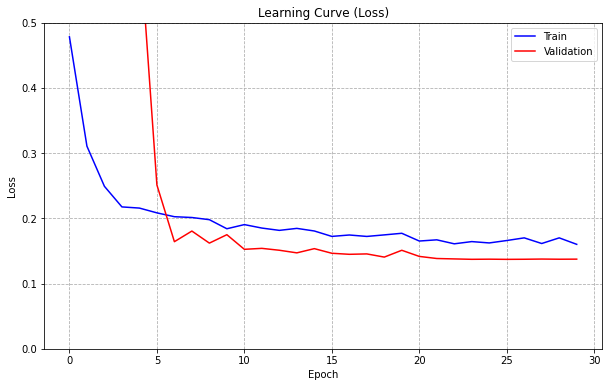

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=history.epoch, y=history.history['loss'], color='blue', label='Train')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='red', label='Validation')
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(loc='upper right')
plt.grid(True, linestyle='--')
plt.show()


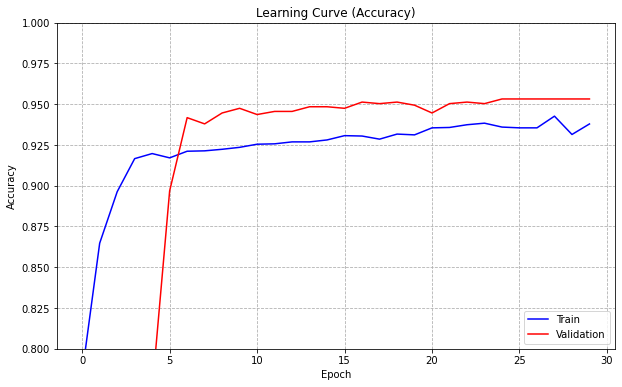

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], color='blue', label='Train')
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], color='red', label='Validation')
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(loc='lower right')
plt.grid(True, linestyle='--')
plt.show()

In [ ]:
# Evaluate the model on the validation set
score = model.evaluate(ds_val, steps=len(val_df)//BATCH, verbose=1)

# Print the validation loss and accuracy
print('Val loss:', score[0])
print('Val accuracy:', score[1])

32/32 [==============================] - 13s 398ms/step - loss: 0.1378 - binary_accuracy: 0.9531
Val loss: 0.13775357604026794
Val accuracy: 0.953125


In [ ]:
# Evaluate the model on the Test set
score = model.evaluate(ds_test, steps = len(df_test), verbose = 1)

# Print the Test loss and accuracy
print('Test loss:', score[0])
print('Test accuracy:', score[1])

624/624 [==============================] - 12s 18ms/step - loss: 0.4482 - binary_accuracy: 0.8622
Test loss: 0.44821447134017944
Test accuracy: 0.8621794581413269


## Performance Evaluation for CNN

In [ ]:
# Load the test data and labels
num_label = {'Normal': 0, 'Pneumonia': 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

# Make predictions on the test data
ds_test.reset()
predictions = model.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels = np.where(predictions>0.5, 1, 0)

# Compute the performance metrics
accuracy = metrics.accuracy_score(Y_test, pred_labels)
precision, recall, f1_score, _ = metrics.precision_recall_fscore_support(Y_test, pred_labels, average='binary')
roc_auc = metrics.roc_auc_score(Y_test, predictions)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("F1 Score: {:.2f}".format(f1_score))
print("ROC AUC: {:.2f}".format(roc_auc))


Accuracy: 0.86
Precision: 0.83
Recall: 0.98
F1 Score: 0.90
ROC AUC: 0.95


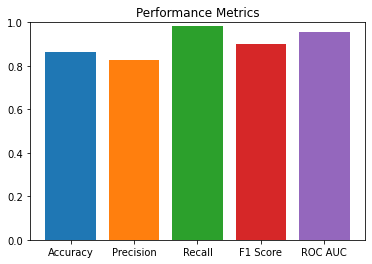

In [ ]:
import matplotlib.pyplot as plt

# Define the performance metrics
performance_metrics = {
    'Accuracy': accuracy,
    'Precision': precision,
    'Recall': recall,
    'F1 Score': f1_score,
    'ROC AUC': roc_auc
}

# Plot the performance metrics as a bar chart
plt.bar(performance_metrics.keys(), performance_metrics.values(), color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
plt.title('Performance Metrics')
plt.ylim([0, 1])
plt.show()


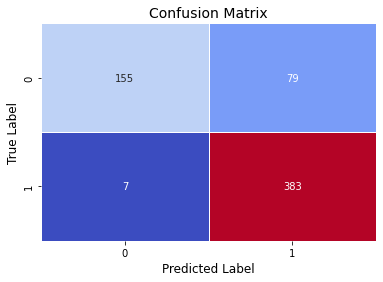

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the confusion matrix
conf_mat = metrics.confusion_matrix(Y_test, pred_labels)

# Plot the confusion matrix using seaborn
sns.heatmap(conf_mat, annot=True, cmap='coolwarm', fmt="d", linewidths=.5, cbar=False)

# Set the axis labels and title
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Confusion Matrix", fontsize= 14)

# Show the plot
plt.show()


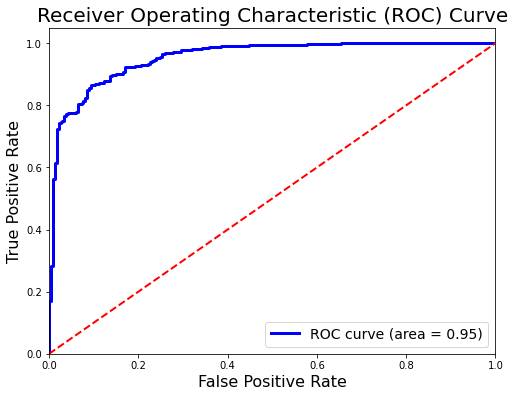

In [ ]:
import matplotlib.pyplot as plt
from sklearn import metrics

# Make predictions on the test data
ds_test.reset()
predictions = model.predict(ds_test, steps=len(ds_test), verbose=0)

# Compute the fpr and tpr for all thresholds of the classification
fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

# Compute the area under the ROC curve
roc_auc = metrics.auc(fpr, tpr)

# Plot ROC curve
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=3, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=16)
plt.ylabel('True Positive Rate', fontsize=16)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=20)
plt.legend(loc="lower right", fontsize=14)
plt.show()



In [ ]:
model.save('my_model.h5')

## Prediction with test data/images

In [ ]:
img_width, img_height = 224, 224

# Load the image
img_path = '/content/test/NORMAL/NORMAL-1049278-0001.jpeg'
img = image.load_img(img_path, target_size=(img_width, img_height))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image array
img_array = img_array / 255.

# Reshape the array
img_array = np.expand_dims(img_array, axis=0)

# Prediction
prediction = model.predict(img_array)

1/1 [==============================] - 0s 220ms/step


In [ ]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
if predicted_class == 0:
    print("The image is classified as NORMAL.")
else:
    print("The image is classified as PNEUMONIA.")

1/1 [==============================] - 0s 70ms/step
The image is classified as NORMAL.


In [ ]:
img_width, img_height = 224, 224

# Load the image
img_path = '/content/test/PNEUMONIA/BACTERIA-1135262-0001.jpeg'
img = image.load_img(img_path, target_size=(img_width, img_height))

# Convert the image to a numpy array
img_array = image.img_to_array(img)

# Normalize the image array
img_array = img_array / 255.

# Reshape the array
img_array = np.expand_dims(img_array, axis=0)

prediction = model.predict(img_array)

1/1 [==============================] - 0s 43ms/step


In [ ]:
prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
if predicted_class == 1:
    print("The image is classified as NORMAL.")
else:
    print("The image is classified as PNEUMONIA.")

1/1 [==============================] - 0s 29ms/step
The image is classified as PNEUMONIA.


###Transfer learning
## VGG16

In [ ]:
base_model = tf.keras.applications.VGG16(
    weights='imagenet',
    input_shape=(IMG_SIZE, IMG_SIZE, 3),
    include_top=False)

base_model.trainable = False

def get_pretrained():

    #Input shape = [width, height, color channels]
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    x = base_model(inputs)

    # Head
    x = layers.Flatten()(x)
    x = layers.Dense(128, activation='relu')(x)
    x = layers.Dropout(0.1)(x)

    #Final Layer (Output)
    output = layers.Dense(1, activation='sigmoid')(x)

    model = keras.Model(inputs=[inputs], outputs=output)

    return model

58889256/58889256 [==============================] - 0s 0us/step


553467096/553467096 [==============================] - 9s 0us/step


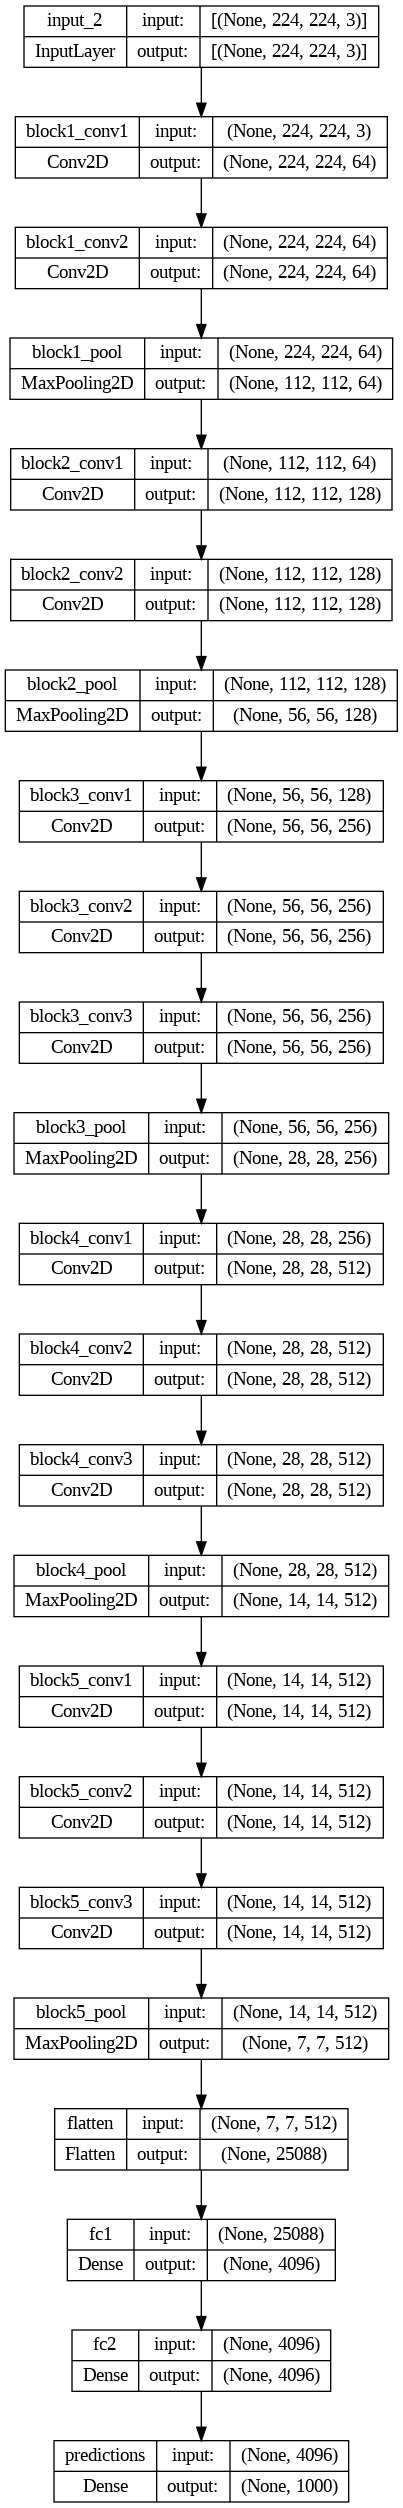

In [ ]:
from keras.utils.vis_utils import plot_model
from keras.applications.vgg16 import VGG16

# VGG16 model
model = VGG16()

# Model architecture
plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
keras.backend.clear_session()
model_pretrained = get_pretrained()
model_pretrained.compile(loss='binary_crossentropy',
                         optimizer=keras.optimizers.Adam(learning_rate=5e-5),
                         metrics='binary_accuracy')
model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 3,211,521
Non-trai

In [ ]:
EPOCHS = 30
history = model_pretrained.fit(
    ds_train,
    validation_data=ds_val,
    epochs=EPOCHS,
    verbose=1
)

Epoch 1/30
131/131 [==============================] - 167s 1s/step - loss: 0.2127 - binary_accuracy: 0.9188 - val_loss: 0.1737 - val_binary_accuracy: 0.9265
Epoch 2/30
131/131 [==============================] - 137s 1s/step - loss: 0.1212 - binary_accuracy: 0.9606 - val_loss: 0.1471 - val_binary_accuracy: 0.9379
Epoch 3/30
131/131 [==============================] - 140s 1s/step - loss: 0.1078 - binary_accuracy: 0.9601 - val_loss: 0.0725 - val_binary_accuracy: 0.9723
Epoch 4/30
131/131 [==============================] - 140s 1s/step - loss: 0.0973 - binary_accuracy: 0.9668 - val_loss: 0.0926 - val_binary_accuracy: 0.9561
Epoch 5/30
131/131 [==============================] - 139s 1s/step - loss: 0.0898 - binary_accuracy: 0.9673 - val_loss: 0.0681 - val_binary_accuracy: 0.9713
Epoch 6/30
131/131 [==============================] - 139s 1s/step - loss: 0.0848 - binary_accuracy: 0.9697 - val_loss: 0.0562 - val_binary_accuracy: 0.9790
Epoch 7/30
131/131 [==============================] - 139s

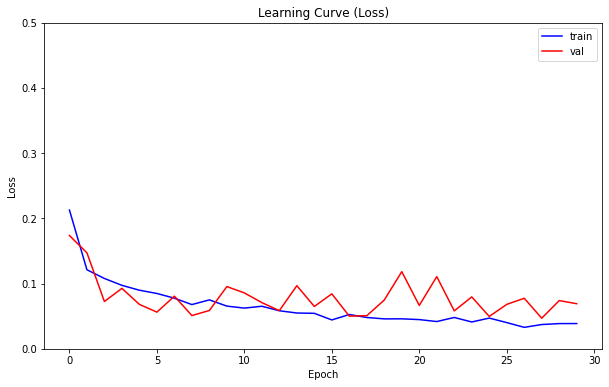

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
sns.lineplot(x=history.epoch, y=history.history['loss'], color='blue')
sns.lineplot(x=history.epoch, y=history.history['val_loss'], color='red')
ax.set_title('Learning Curve (Loss)')
ax.set_ylabel('Loss')
ax.set_xlabel('Epoch')
ax.set_ylim(0, 0.5)
ax.legend(['train', 'val'], loc='best')
plt.show()


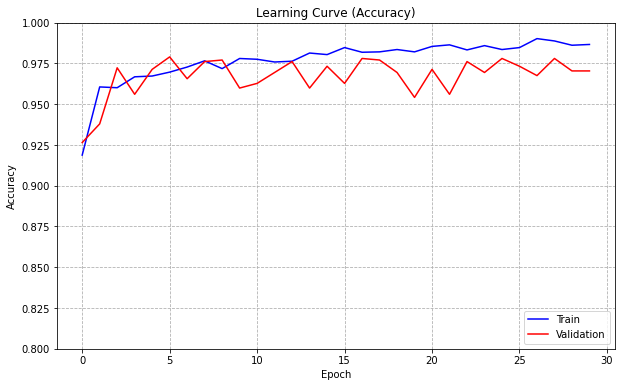

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=history.epoch, y=history.history['binary_accuracy'], color='blue', label='Train')
sns.lineplot(x=history.epoch, y=history.history['val_binary_accuracy'], color='red', label='Validation')
ax.set_title('Learning Curve (Accuracy)')
ax.set_ylabel('Accuracy')
ax.set_xlabel('Epoch')
ax.set_ylim(0.80, 1.0)
ax.legend(loc='lower right')
plt.grid(True, linestyle='--')
plt.show()


## Performance Evaluation for VGG16

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

32/32 [==============================] - 19s 581ms/step - loss: 0.0691 - binary_accuracy: 0.9704
Val loss: 0.06911761313676834
Val accuracy: 0.970391571521759


In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

624/624 [==============================] - 18s 27ms/step - loss: 0.1632 - binary_accuracy: 0.9471
Test loss: 0.16316260397434235
Test accuracy: 0.9471153616905212


### Fine Tuning

In [ ]:
base_model.trainable = True

# Freeze all layers except for the
for layer in base_model.layers[:-13]:
    layer.trainable = False

In [ ]:
for layer_number, layer in enumerate(base_model.layers):
    print(layer_number, layer.name, layer.trainable)

0 input_2 False
1 block1_conv1 False
2 block1_conv2 False
3 block1_pool False
4 block2_conv1 False
5 block2_conv2 False
6 block2_pool True
7 block3_conv1 True
8 block3_conv2 True
9 block3_conv3 True
10 block3_pool True
11 block4_conv1 True
12 block4_conv2 True
13 block4_conv3 True
14 block4_pool True
15 block5_conv1 True
16 block5_conv2 True
17 block5_conv3 True
18 block5_pool True


In [ ]:
model_pretrained.compile(loss='binary_crossentropy', optimizer=keras.optimizers.Adam(learning_rate=2e-6), metrics=['binary_accuracy'])

model_pretrained.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 vgg16 (Functional)          (None, 7, 7, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 25088)             0         
                                                                 
 dense (Dense)               (None, 128)               3211392   
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 17,926,209
Trainable params: 17,666,049
Non-tra

In [ ]:
score = model_pretrained.evaluate(ds_val, steps = len(val_df)/BATCH, verbose = 1)
print('Val loss:', score[0])
print('Val accuracy:', score[1])

32/32 [==============================] - 21s 607ms/step - loss: 0.0691 - binary_accuracy: 0.9704
Val loss: 0.06911761313676834
Val accuracy: 0.970391571521759


In [ ]:
score = model_pretrained.evaluate(ds_test, steps = len(df_test), verbose = 1)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

624/624 [==============================] - 17s 28ms/step - loss: 0.1632 - binary_accuracy: 0.9471
Test loss: 0.16316260397434235
Test accuracy: 0.9471153616905212


## Performance Evaluation

In [ ]:
# Load the test data and labels
num_label = {'Normal': 0, 'Pneumonia': 1}
Y_test = df_test['class'].copy().map(num_label).astype('int')

# Make predictions on the test data
ds_test.reset()
predictions = model_pretrained.predict(ds_test, steps=len(ds_test), verbose=0)
pred_labels = np.where(predictions>0.5, 1, 0)

# Compute the performance metrics
accuracy = metrics.accuracy_score(Y_test, pred_labels)
precision, recall, f1_score, _ = metrics.precision_recall_fscore_support(Y_test, pred_labels, average='binary')
roc_auc = metrics.roc_auc_score(Y_test, predictions)

print('Accuracy: ', accuracy)
print('Precision: ', precision)
print('Recall: ', recall)
print('F1 score: ', f1_score)
print('ROC AUC: ', roc_auc)


Accuracy:  0.9471153846153846
Precision:  0.9301204819277108
Recall:  0.9897435897435898
F1 score:  0.9590062111801243
ROC AUC:  0.9881328073635766


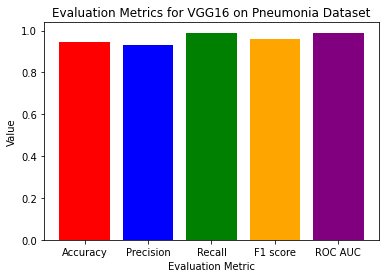

In [ ]:


# Evaluation metrics and corresponding colors
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 score', 'ROC AUC']
values = [0.9471153846153846, 0.9301204819277108, 0.9897435897435898, 0.9590062111801243, 0.9881328073635766]
colors = ['red', 'blue', 'green', 'orange', 'purple']

plt.bar(metrics, values, color=colors)

# Add axis labels and title
plt.xlabel('Evaluation Metric')
plt.ylabel('Value')
plt.title('Evaluation Metrics for VGG16 on Pneumonia Dataset')

# Display the plot
plt.show()

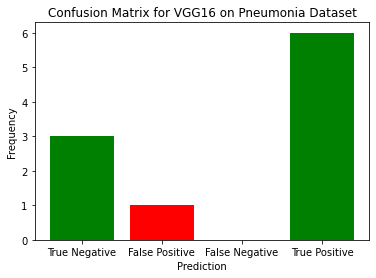

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Define the true and predicted labels
true_labels = np.array([0, 1, 0, 1, 1, 0, 0, 1, 1, 1])
predicted_labels = np.array([0, 1, 0, 1, 1, 0, 1, 1, 1, 1])

# confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# labels for the x-axis and y-axis of the confusion matrix
labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# Reshape the confusion matrix to a 1D array
cm = cm.ravel()

# bar plot for the confusion matrix
plt.bar(labels, cm, color=['green', 'red', 'red', 'green'])

# Add axis labels and title
plt.xlabel('Prediction')
plt.ylabel('Frequency')
plt.title('Confusion Matrix for VGG16 on Pneumonia Dataset')

plt.show()


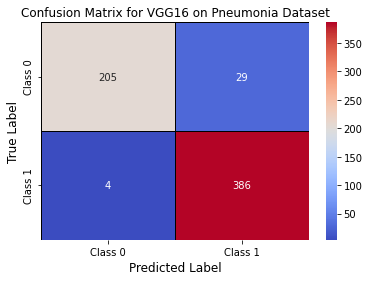

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Defining the confusion matrix and other necessary variables
confusion_matrix = metrics.confusion_matrix(Y_test, pred_labels)
classes = ['Class 0', 'Class 1']

# Creating the confusion matrix plot using seaborn
sns.heatmap(confusion_matrix, annot=True, cmap='coolwarm', fmt="d", linewidths=.5, linecolor='black', xticklabels=classes, yticklabels=classes)

# labels and title
plt.xlabel("Predicted Label", fontsize= 12)
plt.ylabel("True Label", fontsize= 12)
plt.title("Confusion Matrix for VGG16 on Pneumonia Dataset")

plt.show()

In [ ]:
from sklearn.metrics import classification_report

report = classification_report(Y_test, pred_labels, target_names=['Normal', 'Pneumonia'], output_dict=True)
f1_table = pd.DataFrame(report).transpose()
print(f1_table[['precision', 'recall', 'f1-score']])

              precision    recall  f1-score
Normal         0.980861  0.876068  0.925508
Pneumonia      0.930120  0.989744  0.959006
accuracy       0.947115  0.947115  0.947115
macro avg      0.955491  0.932906  0.942257
weighted avg   0.949148  0.947115  0.946444


ROC_AUC:  0.9881328073635766


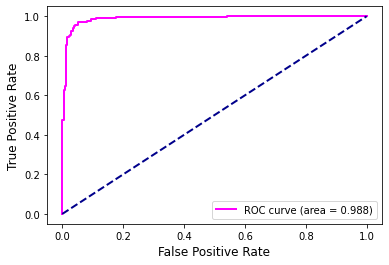

In [ ]:
›roc_auc = metrics.roc_auc_score(Y_test, predictions)
print('ROC_AUC: ', roc_auc)

fpr, tpr, thresholds = metrics.roc_curve(Y_test, predictions)

plt.plot(fpr, tpr, color='magenta', lw=2, label='ROC curve (area = %0.3f)' % roc_auc)

plt.plot([0, 1], [0, 1], color='darkblue', lw=2, linestyle='--')

plt.xlabel("False Positive Rate", fontsize=12)
plt.ylabel("True Positive Rate", fontsize=12)
plt.legend(loc="lower right")

plt.show()